# Popularity-based Recommender Demo

In [ ]:
# dependencies
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# load data
df = pd.read_csv('data/ecommerce-data.csv', encoding='unicode-escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# data cleaning
# show the empty rows
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [ ]:
# remove rows with empty description
df_new = df.dropna(subset=["Description"])
df_new.describe()

,Quantity,UnitPrice,CustomerID
count,540455.000000,540455.000000,406829.000000
mean,9.603129,4.623519,15287.690570
std,218.007598,96.889628,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
# remove rows with wrong numerical data
df_new = df_new[df_new.Quantity>0]
df_new.describe()

,Quantity,UnitPrice,CustomerID
count,530693.000000,530693.000000,397924.000000
mean,10.605819,3.861599,15294.315171
std,156.637853,41.833162,1713.169877
min,1.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [ ]:
# global popularities
global_popularities = df_new.pivot_table(
    index=['StockCode','Description'],
    values='Quantity',
    aggfunc='sum').sort_values(by='Quantity',ascending=False)

print('TOP 10 POPULAR ITEMS GLOBALLY')
global_popularities.head(10)

TOP 10 POPULAR ITEMS GLOBALLY


,,Quantity
StockCode,Description,
23843,"PAPER CRAFT , LITTLE BIRDIE",80995
23166,MEDIUM CERAMIC TOP STORAGE JAR,78033
84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047
85099B,JUMBO BAG RED RETROSPOT,48478
85123A,WHITE HANGING HEART T-LIGHT HOLDER,37603
22197,POPCORN HOLDER,36761
84879,ASSORTED COLOUR BIRD ORNAMENT,36461
21212,PACK OF 72 RETROSPOT CAKE CASES,36419
23084,RABBIT NIGHT LIGHT,30788


Text(0, 0.5, 'Item')

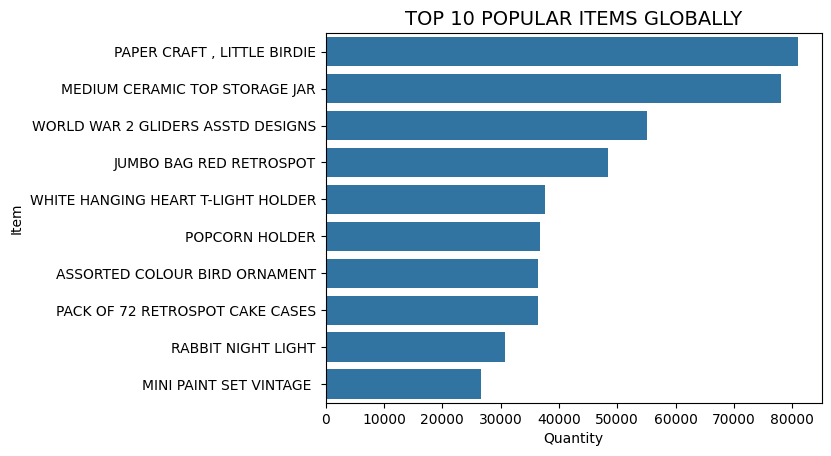

In [ ]:
# Draw a bar chart
global_popularities.reset_index(inplace=True)
sb.barplot(y='Description', x='Quantity', data=global_popularities.head(10))
plt.title('TOP 10 POPULAR ITEMS GLOBALLY', fontsize=14)
plt.ylabel('Item')


Text(0, 0.5, 'Item')

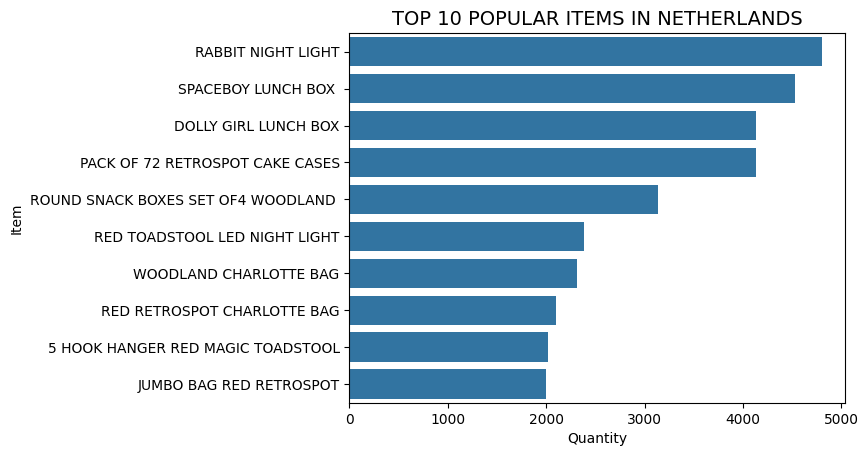

In [ ]:
# Calculate popularities by country
countrywise=df_new.pivot_table(
    index=['Country','StockCode','Description'],
    values='Quantity',
    aggfunc='sum').sort_values(by='Quantity',ascending=False)

countrywise.reset_index(inplace=True)

# Enter country name
country_name = input("Enter country name: ")

sb.barplot(y='Description',
           x='Quantity',
           data=countrywise[
               countrywise['Country']==country_name
               ].head(10))
plt.title('TOP 10 POPULAR ITEMS IN {}'.format(country_name.upper()), fontsize=14)
plt.ylabel('Item')

In [ ]:
# Buy again!
from collections import Counter

def buy_again(customer_id):
    items_bought = df_new[df_new['CustomerID']==customer_id].Description
    bought_again = Counter(items_bought)
    buy_again_list = list(bought_again)
    
    print("ITEMS YOU'D LIKE TO BUY AGAIN")
    return (buy_again_list)

buy_again(17852)
        

ITEMS YOU'D LIKE TO BUY AGAIN


['ANTIQUE TALL SWIRLGLASS TRINKET POT',
 'WHITE BROCANTE SOAP DISH',
 'SET OF 6 SOLDIER SKITTLES',
 'SET OF 3 BUTTERFLY COOKIE CUTTERS',
 'ANTIQUE GLASS DRESSING TABLE POT',
 'BINGO SET',
 'VINTAGE DONKEY TAIL GAME ',
 '3 STRIPEY MICE FELTCRAFT',
 'BLUE DRAWER KNOB ACRYLIC EDWARDIAN',
 'GREEN DRAWER KNOB ACRYLIC EDWARDIAN',
 'PURPLE DRAWERKNOB ACRYLIC EDWARDIAN',
 'RED DRAWER KNOB ACRYLIC EDWARDIAN',
 'DRAWER KNOB CRACKLE GLAZE GREEN',
 'TRADITIONAL WOODEN CATCH CUP GAME ',
 'VINTAGE SNAP CARDS',
 'ANTIQUE SILVER TEA GLASS ENGRAVED',
 'CLASSIC GLASS COOKIE JAR',
 'TRADTIONAL ALPHABET STAMP SET',
 'TRADITIONAL PICK UP STICKS GAME ',
 'SPACEBOY ROCKET LOLLY MAKERS',
 'T-LIGHT HOLDER HANGING LOVE BIRD']